In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [2]:
# Importing dataset 
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Overview of the dataset: includes the shape, number of non-null values, and data types of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Pre-processing

In [4]:
# Dropping uncorrelated attributes from the dataset
drop_columns = ['PassengerId', 'Name']
df.drop(columns=drop_columns, inplace=True)

## Sex attribute

In [5]:
df['Sex'].unique()    # check unique values 

array(['male', 'female'], dtype=object)

In [6]:
# encoding: Label encoding
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])   # male = 1, female = 0

In [7]:
# 2nd encoding method: Dummy encoding 
# df = pd.get_dummies(df, drop_first = True, columns = ['Sex'])   # Sex => Sex_Male = True when male, False when female

## Age attribute

In [8]:
df['Age'].unique()
df['Age'].nunique()

88

In [9]:
# Generalization (Rounding)
df['Age'] = df['Age'].round()
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
# Missing values: Impute using KNNImputer
knn_imputer = KNNImputer(n_neighbors = 5)

df[['Age']] = knn_imputer.fit_transform(df[['Age']])

df['Age'].isnull().sum()

0

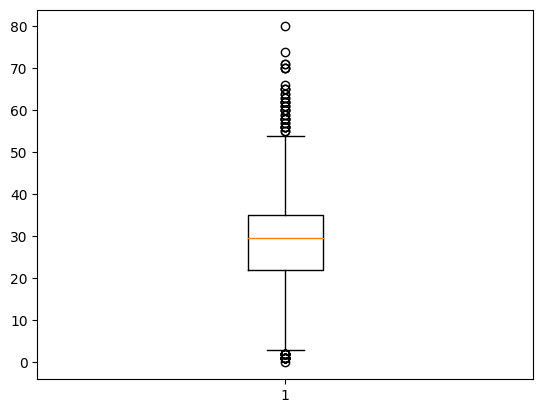

In [11]:
# Checking outliers 
plt.boxplot(df['Age'])
plt.show()

In [12]:
# Calculate quartiles Q1 & Q3
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
    
iqr = q3 - q1    # interquartile range

# Calculate non outlier values range
lower_bound = q1 - 1.5 * iqr    # lower bound of non-outlier values range
upper_bound = q3 + 1.5 * iqr  

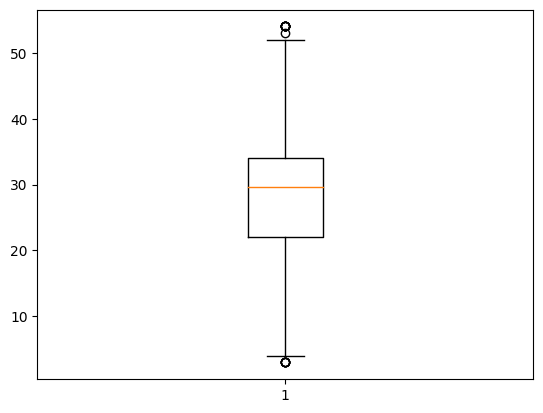

In [13]:
#Removing Outliers
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]    # keep non-outliers only

df.shape
plt.boxplot(df['Age'])
plt.show()

In [14]:
# Cast: float to integer
df['Age'] = df['Age'].astype('int')
df['Age'].dtype

dtype('int32')

## Survived attribute : Target Variable

In [15]:
# Encoding: already encoded
# Missing values: 0
print(df['Survived'].isnull().sum())

0


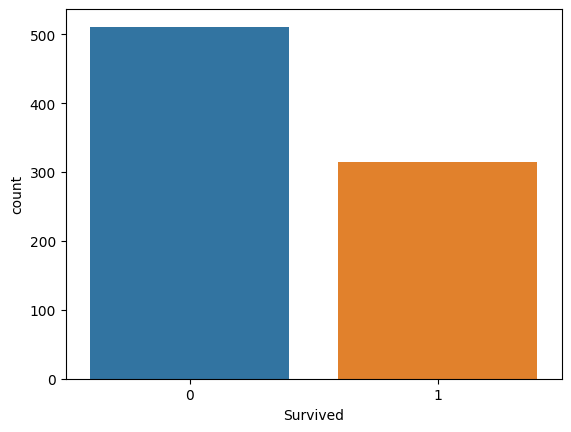

In [16]:
# Imbalanced data: check using bar plot (either using matplotlib or seaborn)
sns.countplot(x = 'Survived', data = df)
plt.show()
# it's balanced

## Cabin Attribute

In [17]:
# Drop it as it contains many missing values
df = df.drop(columns = ['Cabin'], axis = 1)

## Embarked

In [18]:
# Missing values: only 2 => drop instances 
df = df.dropna(subset = ['Embarked'])
df['Embarked'].isna().sum()

0

In [19]:
# Encoding: Dummy  encoding
df = pd.get_dummies(df, drop_first = True, columns = ['Embarked'])   # Embarked => Embarked_Q, Embarked_S  (Embarked_C is dropped)

## Ticket attribute

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,0,3,1,22,1,0,A/5 21171,7.2500,0,1
1,1,1,0,38,1,0,PC 17599,71.2833,0,0
2,1,3,0,26,0,0,STON/O2. 3101282,7.9250,0,1
3,1,1,0,35,1,0,113803,53.1000,0,1
4,0,3,1,35,0,0,373450,8.0500,0,1


In [21]:
df['Ticket'].nunique()

646

In [22]:
# Too much unique values, 
df['Ticket'].value_counts()

CA. 2343        7
1601            7
347082          6
S.O.C. 14879    5
CA 2144         5
               ..
226593          1
9234            1
19988           1
2693            1
370376          1
Name: Ticket, Length: 646, dtype: int64

In [23]:
# Label encoding
df['Ticket'] = label_encoder.fit_transform(df['Ticket'])

## Fare Attribute

In [24]:
# Generalization 
df['Fare'] = df['Fare'].round(2)
df['Fare']

0       7.25
1      71.28
2       7.92
3      53.10
4       8.05
       ...  
886    13.00
887    30.00
888    23.45
889    30.00
890     7.75
Name: Fare, Length: 824, dtype: float64

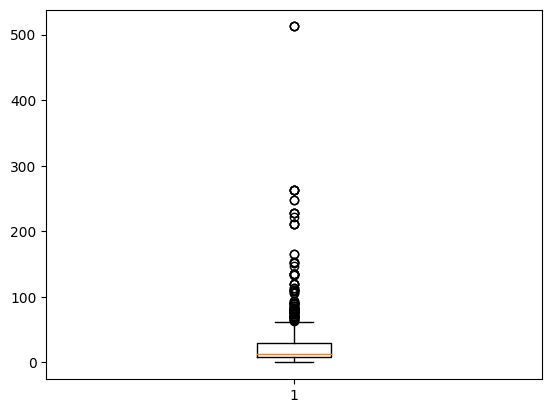

In [25]:
# Check Outliers
plt.boxplot(df['Fare'])
plt.show()

In [26]:
# Calculate quartiles Q1 & Q3
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
    
iqr = q3 - q1    # interquartile range

# Calculate non outlier values range
lower_bound = q1 - 1.5 * iqr    # lower bound of non-outlier values range
upper_bound = q3 + 1.5 * iqr  

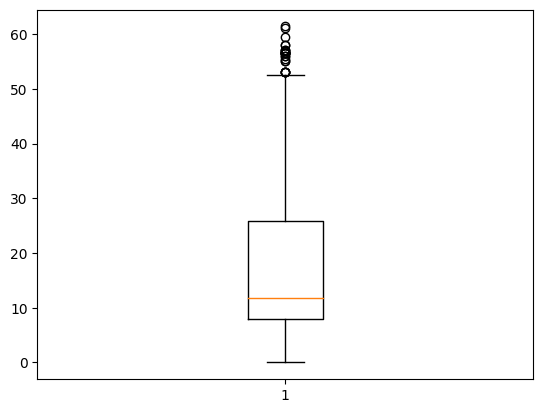

In [27]:
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]    # keep non-outliers only

df.shape
plt.boxplot(df['Fare'])
plt.show()

# Classification Models

## Importing needed libraries

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

## Train test split

In [29]:
X = df.drop(columns = 'Survived', axis = 1)
y = df['Survived']

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Scaling the data 

In [30]:
# Scale the features (normalize units)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [31]:
# Training
logistic_regression = LogisticRegression(max_iter = 200)
logistic_regression.fit(X_train, y_train)


# Testing (Prediction)
y_predict = logistic_regression.predict(X_test)

# Model Evaluation

accuracy = accuracy_score(y_test, y_predict)
report = classification_report(y_test, y_predict)

print(accuracy)
print(report)

0.7777777777777778
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        95
           1       0.70      0.61      0.65        49

    accuracy                           0.78       144
   macro avg       0.75      0.74      0.74       144
weighted avg       0.77      0.78      0.77       144



## Random Forest

In [32]:
#Training the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluation 
accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)

print(accuracy)
print(report)

0.7847222222222222
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        95
           1       0.69      0.67      0.68        49

    accuracy                           0.78       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.78      0.78      0.78       144



In [39]:
# Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        95
           1       0.80      0.67      0.73        49

    accuracy                           0.83       144
   macro avg       0.82      0.79      0.81       144
weighted avg       0.83      0.83      0.83       144

